## Importando as bibliotecas necessárias para o desenvolvimento

Importando as bibliotecas necessárias para o desenvolvimento

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TO DO: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

# TO DO: Importar biblioteca de LinearRegression do sklearn
from sklearn.linear_model import LinearRegression

# Avaliando os modelos de regressão
from sklearn.metrics import mean_squared_error

# Bibliotecas de vizualização de dados
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

1.3.5
1.21.6



## Realizando a carga dos dados


In [ ]:
# TO DO: Realizar a carga dos dados do arquivo salarios.csv
salarios = pd.read_csv('/content/salarios.csv')

In [ ]:
# TO DO: Modificar os nomes das colunas para maiúsculas
salarios.columns = salarios.columns.str.upper()

In [ ]:
salarios.head()

,ANOSEXPERIENCIA,SALARIO,CARGO
0,1.1,39343.0,Analista Financeiros
1,1.3,46205.0,Contador
2,1.5,37731.0,Analista Financeiros
3,2.0,43525.0,Analista de Sistemas
4,2.2,39891.0,Analista de Sistemas


## Análise Exploratória de Dados

Em estatística, a análise exploratória de dados (AED) é uma abordagem à análise de conjuntos de dados de modo a resumir suas características principais, frequentemente com métodos visuais. Um modelo estatístico pode ou não ser usado, mas primariamente a AED tem como objetivo observar o que os dados podem nos dizer além da modelagem formal ou do processo de teste de hipóteses.
Fonte: Wikipedia

In [ ]:
#Análise Exploratória dos Dados
# TO DO: Apresentar informações estatísticas descritivas do dataset
salarios.describe().T


,count,mean,std,min,25%,50%,75%,max
ANOSEXPERIENCIA,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
SALARIO,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


## Início da Análise Exploratória de Dados


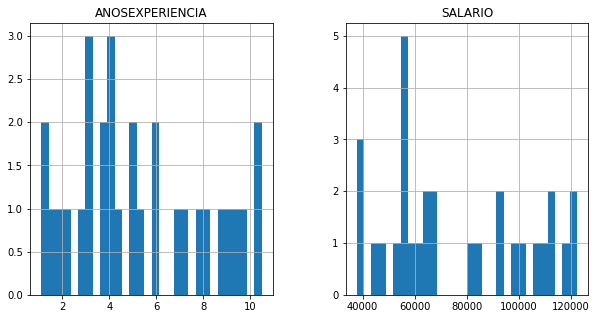

In [ ]:
# Visualizando o conjunto de dados
salarios.hist(bins=30, figsize=(10,5))

plt.show()

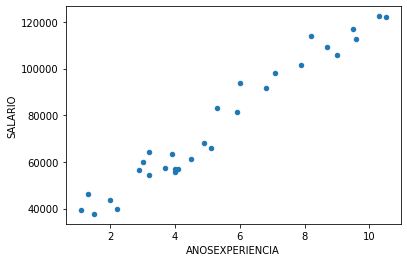

In [ ]:
# Objetivo: Visualizar se existe correlação

salarios.plot(kind='scatter', 
              x='ANOSEXPERIENCIA', 
              y='SALARIO',
#               alpha=0.1 #Parametro para verificação de densidades
             ) 

In [ ]:
# TO DO: Verificar se existe correlação entre as variáveis.
salarios_corr = salarios.corr()
salarios_corr

,ANOSEXPERIENCIA,SALARIO
ANOSEXPERIENCIA,1.000000,0.978242
SALARIO,0.978242,1.000000


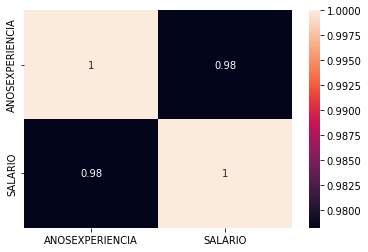

In [ ]:
import seaborn as sns

sns.heatmap(salarios_corr,
            annot=True)

## Resolver valores ausentes - Missing Values 

In [ ]:
# Identifcando valores ausentes 
print(salarios.isnull().sum())

ANOSEXPERIENCIA    0
SALARIO            0
CARGO              0
dtype: int64


In [ ]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ANOSEXPERIENCIA  30 non-null     float64
 1   SALARIO          30 non-null     float64
 2   CARGO            30 non-null     object 
dtypes: float64(2), object(1)
memory usage: 848.0+ bytes


In [ ]:
# TO DO: CRIANDO UMA INSTÂNCIA DA CLASSE LabelEncoder do sci-kit learn

labelEncoder = LabelEncoder()
salarios['CARGO_NUM'] = labelEncoder.fit_transform(salarios['CARGO'])

In [ ]:
salarios.head()

,ANOSEXPERIENCIA,SALARIO,CARGO,CARGO_NUM
0,1.1,39343.0,Analista Financeiros,0
1,1.3,46205.0,Contador,2
2,1.5,37731.0,Analista Financeiros,0
3,2.0,43525.0,Analista de Sistemas,1
4,2.2,39891.0,Analista de Sistemas,1


In [ ]:
from IPython.display import display

X = salarios.loc[:, ['ANOSEXPERIENCIA','CARGO_NUM']].values #Variáveis independentes 
y = salarios.loc[:, 'SALARIO'].values #Variável dependente - rótulo

print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
from sklearn.model_selection import train_test_split

#Separação do dataset em treinamento e tests
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 2)
(8, 2)
(22,)
(8,)


## Criando o modelo de Linear Regression para o conjunto de treinamento 


In [ ]:
# TODO: Instanciar um classificador para Regressão Logística (Logistic Regression)

linear_regressor = LinearRegression()

# Treinando o modelo
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prevendo alguns valores com o conjunto de dados de teste

#Sem indicação de probabilidade
y_pred = linear_regressor.predict(X_test)

y_pred

array([ 61363.2463172 ,  81246.66543299,  90734.55089965, 102076.91403048,
       109651.54988412,  54735.43994527,  37712.09992422,  52822.19033225])

## Avaliando Modelos de Regressão 

Uma medida de desempenho típica para problemas de **REGRESSÃO** é o **RMSE** (Root Mean Square Error). Ele dá uma idéia de quanto erro o sistema geralmente faz em suas previsões, com um peso maior para erros grandes.


In [ ]:
#Valiando o modelo de regressão linear

salario_pred = linear_regressor.predict(X_train)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

7782.42737703562

## Salvando o modelo para uso posterior

In [ ]:
import joblib

joblib.dump(linear_regressor, 'linear_regressor_param_001.pkl')

['linear_regressor_param_001.pkl']

## Restaurando o modelo com um novo conjunto de dados (nunca visto antes)

In [ ]:
# TO DO: Fazendo a carga 

linear_regressor_highlander = joblib.load('linear_regressor_param_001.pkl')


## Utilizando o modelo highlander com dados novos

In [ ]:
# TO DO: Carga de NOVOS dados
salarios_novos_colaboradores = pd.read_csv('/content/salarios_novos_colaboradores.csv')

In [ ]:
salarios_novos_colaboradores.columns = salarios_novos_colaboradores.columns.str.upper()

In [ ]:
salarios_novos_colaboradores.head()

,ANOSEXPERIENCIA,CARGO
0,1.3,Analista Financeiros
1,2.8,Contador
2,3.1,Contador
3,4.1,Analista de Sistemas
4,11.5,Analista de Sistemas


In [ ]:
# TO DO: CRIANDO UMA INSTÂNCIA DA CLASSE LabelEncoder do sci-kit learn

labelEncoder = LabelEncoder()
salarios_novos_colaboradores['CARGO_NUM'] = labelEncoder.fit_transform(salarios_novos_colaboradores['CARGO'])

In [ ]:
salarios_novos_colaboradores.head()

,ANOSEXPERIENCIA,CARGO,CARGO_NUM
0,1.3,Analista Financeiros,0
1,2.8,Contador,2
2,3.1,Contador,2
3,4.1,Analista de Sistemas,1
4,11.5,Analista de Sistemas,1


In [ ]:
X_train = salarios_novos_colaboradores.loc[:, ['ANOSEXPERIENCIA','CARGO_NUM']].values

y_salarios_futuros = linear_regressor_highlander.predict(X_train)

print(y_salarios_futuros)

[ 38379.74787178  53438.33409957  56259.64699411  65188.01243166
 134780.3971635 ]
